In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style
df=pd.read_csv("/content/expected_ctc.csv")
#analyzing the data for the columns
df.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [206]:
#analyzing the datatypes of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [207]:
#analyzing the cout of rows and columns
df.shape

(25000, 29)

In [208]:
#analyzing null values
df.isna().sum()

,0
IDX,0
Applicant_ID,0
Total_Experience,0
Total_Experience_in_field_applied,0
Department,2778
Role,963
Industry,908
Organization,908
Designation,3129
Education,0


In [209]:
df.head(10)
#seperating departments and currentctc
department = df["Department"]
current_ctc = df["Current_CTC"]

In [210]:
df["Current_CTC"].describe()

,Current_CTC
count,2.500000e+04
mean,1.760945e+06
std,9.202125e+05
min,0.000000e+00
25%,1.027312e+06
50%,1.802568e+06
75%,2.443883e+06
max,3.999693e+06


In [211]:
dup=df.duplicated()
print((dup.sum()))
#finding duplicate columns

0


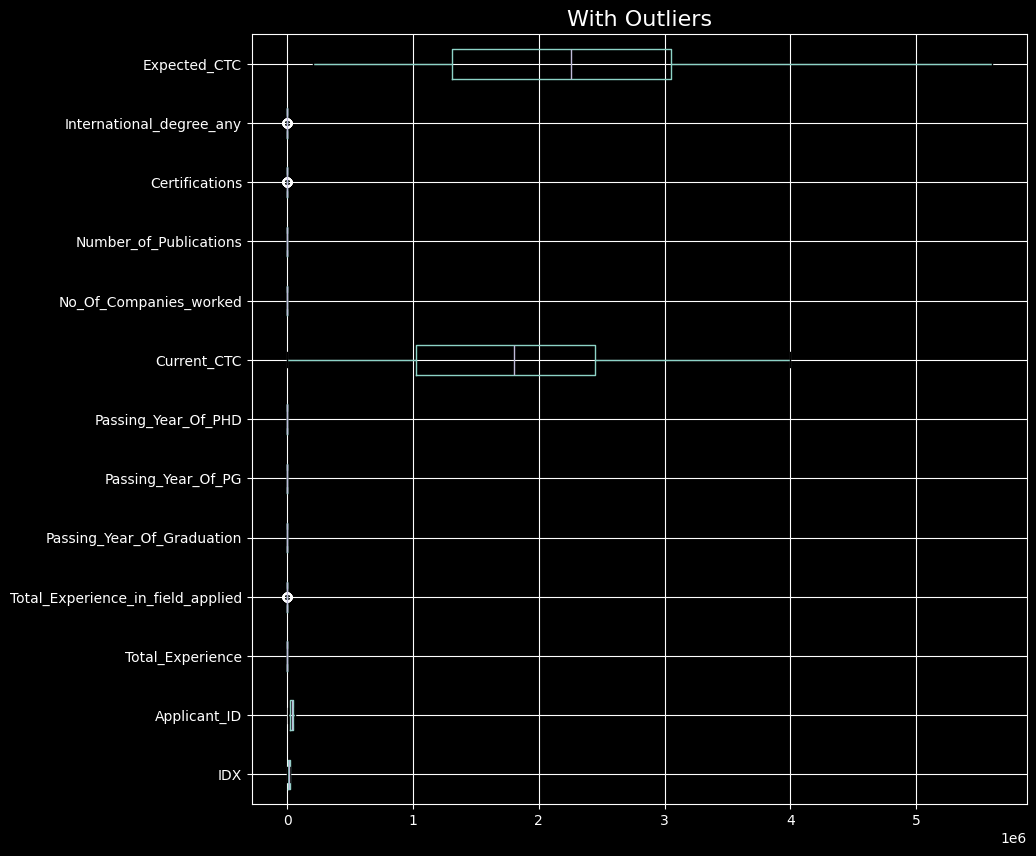

In [212]:
#checking outliers
cont = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 10))
df[cont].boxplot(vert=False)
plt.title('With Outliers', fontsize=16)
plt.show()

In [213]:
#fixing outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [214]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

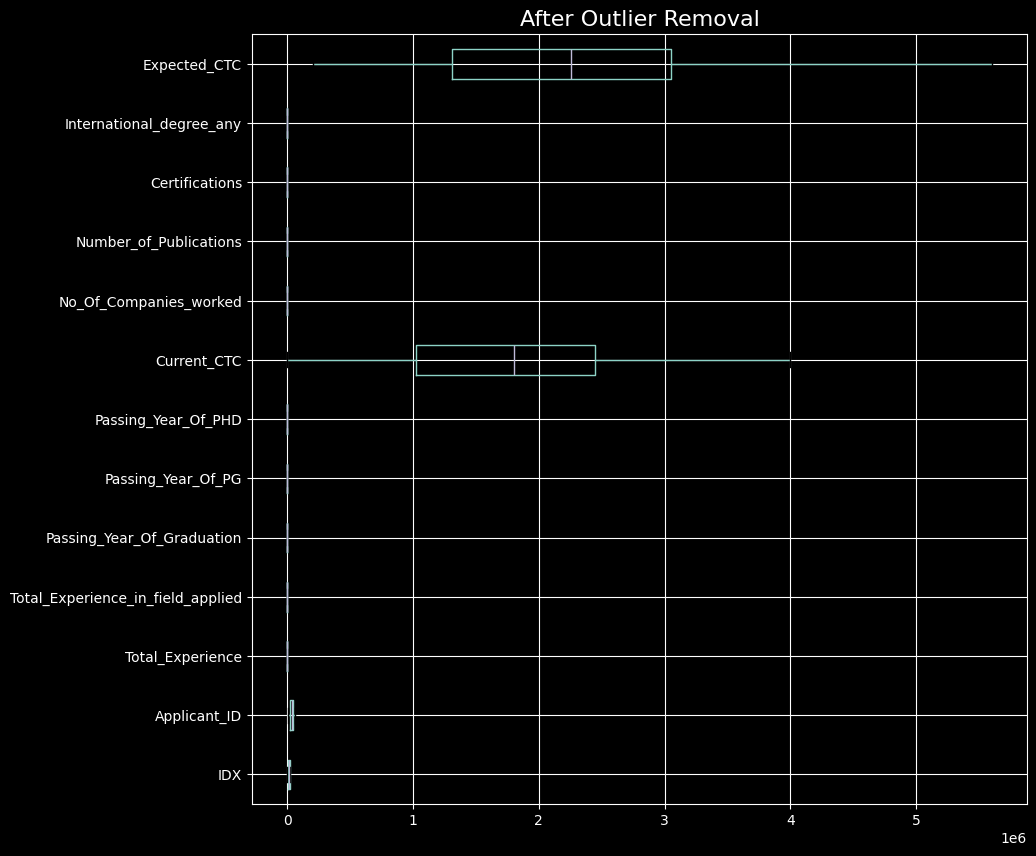

In [215]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=False)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

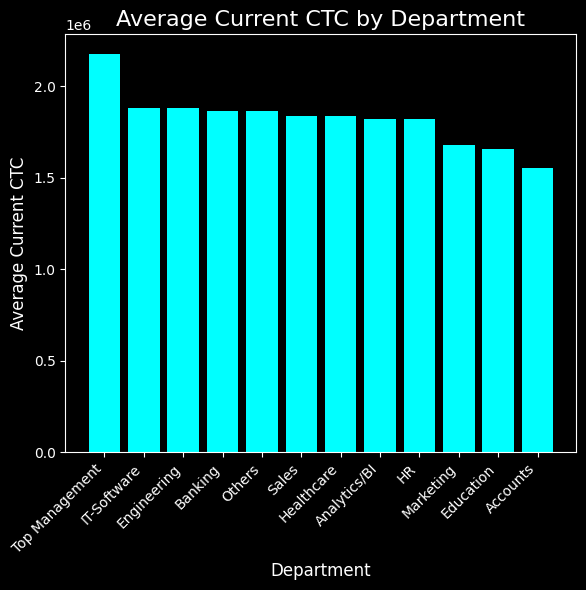

In [216]:
#comparing the department and its salaries
bar1=df.groupby("Department")["Current_CTC"].mean().sort_values(ascending=False)
plt.figure(figsize=(6,6))
plt.bar(bar1.index, bar1.values, color='cyan')
plt.title("Average Current CTC by Department", fontsize=16)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Average Current CTC", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [217]:
#fill missing numeric values with mean
for col in df.columns:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(df[col].mean())
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Unknown')
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category').cat.codes
#filled missing categoriacal values with numeric values with assigning each unique
# element to a number

In [218]:
#training and testing
X = df.drop(columns=['IDX', 'Applicant_ID', 'Expected_CTC','Passing_Year_Of_PHD'])
Y = df['Expected_CTC']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
#rmse found

Root Mean Squared Error (RMSE): 157,395.16


In [219]:
#comparing rmse and expectedctc
meanexpctc=df['Expected_CTC'].mean()
percentage=(rmse/meanexpctc)*100
print(percentage)

6.994860269143506


In [220]:
#The model have a rmse of 157,395 against a mean salary of ~2,250,154, indicating a relative error of around 7%.